In [14]:
# Import the requests library.
import requests
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [15]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [16]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [17]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

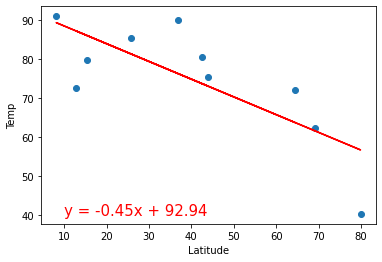

In [18]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [2]:
x = 1
latitudes = []
while x < 11:
    random_lat  = random.randint(-90,89) + random.random()
    latitudes.append(random_lat)
    x+=1
latitudes

[9.920370817094007,
 42.40802652405758,
 49.74411663376101,
 22.558676090908396,
 -1.7385924314382488,
 -67.47323642808513,
 70.74413461668408,
 81.18283286703355,
 -68.14022679174678,
 -73.76869055795243]

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mataura pf
hobart au
atuona pf
chuy uy
albany au
rikitea pf
kapaa us
cape town za
assiniboia ca
bathsheba bb
jamestown sh
belushya guba ru
vaini to
mataura pf
punta arenas cl
mataura pf
port alfred za
haines junction ca
kruisfontein za
cayenne gf
baykit ru
manuk mangkaw ph
constitucion mx
lagoa pt
busselton au
mataura pf
rikitea pf
ushuaia ar
sabang id
buala sb
jamestown sh
port alfred za
bluff nz
tasiilaq gl
rikitea pf
kinango ke
avarua ck
arraial do cabo br
hami cn
rikitea pf
thompson ca
bria cf
illoqqortoormiut gl
hobart au
rikitea pf
ostrovnoy ru
arraial do cabo br
busselton au
ancud cl
east london za
busselton au
chuy uy
tasbuget kz
kavieng pg
carnarvon au
kaitangata nz
barrow us
mar del plata ar
wielun pl
hermanus za
punta arenas cl
dikson ru
yellowknife ca
bahia blanca ar
nisia floresta br
aksarka ru
thompson ca
vila franca do campo pt
the valley ai
new norfolk au
at-bashi kg
illoqqortoormiut gl
saint-medard-en-jalles fr
vaitupu wf
tanete id
port hardy ca
new norfolk au
half moo

sao filipe cv
new norfolk au
rikitea pf
gorontalo id
airai pw
stawell au
sakaiminato jp
sitka us
airai pw
vaini to
nizhneyansk ru
naousa gr
lithakia gr
sao filipe cv
new norfolk au
carnarvon au
nome us
arraial do cabo br
santiago del estero ar
menongue ao
mvuma zw
hilo us
bonavista ca
qandala so
guna in
qaanaaq gl
port alfred za
alexandria eg
rikitea pf
kalmar se
albany au
punta arenas cl
mandera ke
bend us
jamestown sh
aegviidu ee
new norfolk au
puerto ayora ec
ushuaia ar
hobart au
laguna br
ushuaia ar
georgetown sh
taolanaro mg
juarez mx
nanortalik gl
carnarvon au
hihifo to
rikitea pf
fohnsdorf at
cayenne gf
hermanus za
saint pete beach us
cape town za
mataura pf
jamestown sh
port alfred za
the valley ai
doha qa
tuktoyaktuk ca
comodoro rivadavia ar
punta arenas cl
bredasdorp za
mar del plata ar
cidreira br
sentyabrskiy ru
vaitupu wf
mahebourg mu
centralia us
nikolskoye ru
acajutla sv
jaru br
hobart au
punta arenas cl
jamestown sh
tocopilla cl
punta arenas cl
ushuaia ar
mataura pf
son

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=af3779bb55cd4d4d5b76cb05133f5dad


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
     # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

    
   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 1 | hobart
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 1 | atuona
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 1 | chuy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 1 | albany
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 1 | rikitea
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 1 | kapaa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 8 of Set 1 | cape town
----

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 2 | jiwani
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 2 | dolbeau
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 2 | qaanaaq
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 2 | erenhot
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 2 | belmonte
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 19 of Set 2 | ovre ardal
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 20 of Set 2 | camapua
-----------------------------
Data Retrieval Complete      

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 3 | ystad
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 3 | rio grande
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 3 | ahuimanu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 3 | bambous virieux
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 3 | gamboula
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 3 | san quintin
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 32 of Set 3 | oloron-sainte-marie
-----------------------------
Data Retrieval Complete      
---

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 4 | saleaula
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 4 | karachev
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 4 | camopi
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 4 | tessalit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 4 | brits
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 44 of Set 4 | dwarka
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 45 of Set 4 | havre-saint-pierre
-----------------------------
Data Retrieval Complet

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 6 | ouahigouya
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 6 | richards bay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 6 | sao sebastiao
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 6 | ha tinh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 6 | ekibastuz
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 6 of Set 6 | gobabis
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 7 of Set 6 | tornio
-----------------------------
Data Retrieval Complete      
----------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 7 | mutoko
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 7 | esperance
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 7 | tuatapere
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 7 | balkanabat
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 7 | ahipara
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 7 | inongo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 18 of Set 7 | metu
-----------------------------
Data Retrieval Complete      
----------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 25 of Set 8 | saint pete beach
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 26 of Set 8 | doha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 27 of Set 8 | comodoro rivadavia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 28 of Set 8 | centralia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 29 of Set 8 | acajutla
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 30 of Set 8 | jaru
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 31 of Set 8 | tocopilla
-----------------------------
Data Retrieval Complete      
-----------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 37 of Set 9 | kirakira
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 38 of Set 9 | santa cruz
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 39 of Set 9 | mariental
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 40 of Set 9 | corinto
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 41 of Set 9 | oranjestad
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 42 of Set 9 | cabedelo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 43 of Set 9 | cortez
-----------------------------
Data Retrieval Complete      
---------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 49 of Set 10 | kapoeta
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 50 of Set 10 | nelson bay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 1 of Set 11 | iqaluit
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 2 of Set 11 | sola
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 3 of Set 11 | pangkalanbuun
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 4 of Set 11 | ginda
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 5 of Set 11 | straldza
City not found. Skipping...
-----------------------------
Data Retrieval Complete  

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 11 of Set 12 | labuhan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 12 of Set 12 | port lincoln
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 13 of Set 12 | biltine
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 14 of Set 12 | vesyegonsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 15 of Set 12 | quatre cocos
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 16 of Set 12 | kirando
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing Record 17 of Set 12 | cam pha
City not found. Skipping...
-----------------------------
Data Retriev

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,49.48,83,36,2.24,NZ,2021-10-06 19:36:04
1,Hobart,-42.8794,147.3294,48.06,77,75,1.99,AU,2021-10-06 19:36:04
2,Atuona,-9.8000,-139.0333,78.42,79,14,22.66,PF,2021-10-06 19:36:04
3,Chuy,-33.6971,-53.4616,55.33,64,63,17.69,UY,2021-10-06 19:36:04
4,Albany,42.6001,-73.9662,71.94,69,60,2.71,US,2021-10-06 19:31:13
...,...,...,...,...,...,...,...,...,...
559,Olinda,-8.0089,-34.8553,80.33,74,75,16.11,BR,2021-10-06 19:38:31
560,Morshansk,53.4435,41.8107,40.46,71,95,4.90,RU,2021-10-06 19:38:31
561,Hofn,64.2539,-15.2082,41.02,75,75,17.27,IS,2021-10-06 19:38:31
562,Am Timan,11.0297,20.2827,81.18,56,5,2.28,TD,2021-10-06 19:38:32


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-10-06 19:36:04,-46.1927,168.8643,49.48,83,36,2.24
1,Hobart,AU,2021-10-06 19:36:04,-42.8794,147.3294,48.06,77,75,1.99
2,Atuona,PF,2021-10-06 19:36:04,-9.8000,-139.0333,78.42,79,14,22.66
3,Chuy,UY,2021-10-06 19:36:04,-33.6971,-53.4616,55.33,64,63,17.69
4,Albany,US,2021-10-06 19:31:13,42.6001,-73.9662,71.94,69,60,2.71
5,Rikitea,PF,2021-10-06 19:36:05,-23.1203,-134.9692,73.92,79,99,18.92
6,Kapaa,US,2021-10-06 19:36:05,22.0752,-159.3190,80.58,72,20,3.00
7,Cape Town,ZA,2021-10-06 19:36:05,-33.9258,18.4232,66.88,64,0,4.00
8,Assiniboia,CA,2021-10-06 19:35:41,49.6334,-105.9845,76.91,14,100,11.50
9,Bathsheba,BB,2021-10-06 19:36:06,13.2167,-59.5167,81.21,83,75,17.27


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")